Referencing: https://math.mit.edu/~jorloff/18.04/notes/topic6.pdf

We can formulate a stationary, incompressible and irrotational flow described by a velocity field $ F = ( u(x,y), v(x,y) ) $, where $(u ,v)$ desribes the velocity at a point $(x, y)$. 

- Stationary:     $F(x, y)$ is time independent
- Incompressible: $\nabla F  = u_x + v_y = 0$  
- Irrotational:   $\nabla \times F = v_x - u_y = 0$ 

The last two eq looks like the Cauchy-Reimann eq. Indeed, given a stationay, incompressible and irrotational flow $F = (u,v)$, we can always find a Complex Analytic Function $P(z) = p(x,y) + i s(x,y)$, which is a complex potential funtion of $F$ such that $F = \nabla p$.

- $p$ is the potential function <br>
- $s$ is the stream function

Given $F$, we can find $P$ by, <br> 
$P'= u - iv$ , integrating, we get<br>
$P = u + iv$

Let's visualize some of these complex functions of flows!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# remove annoying errors from division on NaN
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Consider the uniform flow $P = x + iy$
The potential is $p=x$, and the stream function is $s = y$. 
The velocity field is $\nabla p = (1,0)$ , so we have a uniform flow to the right. 

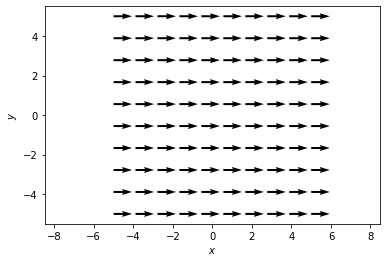

In [2]:
# Grid for plotting 
x, y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

# The velocity potential 
u = 1
v = 0

# Plot the given velocity field 
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

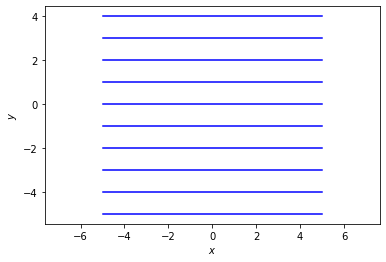

In [3]:
# The stream function is s = y. The level curves of the stream function is s = y = const.  
x = np.linspace(-5,5,2)

# Sample 10 level curves 
for i in range(10):
    y = np.full(2,-5+i)
    plt.plot(x,y, c="b")
    
# Plot the level curves 
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Consider the linear source $P = log(z) = log(r) + i\theta $
The potential is $p = log(r)$, and the stream function is $s = \theta$. <br>
The velocity field is $F = \nabla log(r) = (x/r^2, y/r^2)$.<br>
Thus, the vector field should decrease radially outwards. 

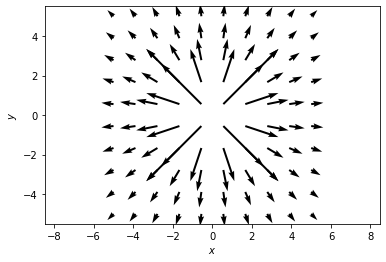

In [4]:
# Repeat for the new potential 
x, y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x/(x**2+y**2)
v = y/(x**2+y**2)

plt.axis('equal')
plt.quiver(x,y,u,v)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

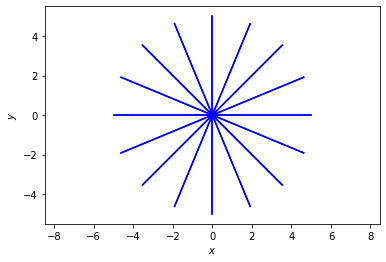

In [5]:
# The stream function is s = theta. The level curves of the stream function is s = theta = const.  
r = np.linspace(-5,5,2)

for i in range(16):   
    t = np.pi*2*i/16 # sample 16 theta values equally within 2 pi 
    plt.plot(r*np.cos(t),r*np.sin(t), c="b")
    
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Colliding Flow $P = (x^2 - y^2) + 2ixy$
The potential is $p = (x^2 - y^2)$, and the stream function is $s = 2xy$. <br>
The velocity field is $F = \nabla p = (2x, 2y)$.<br>


#### Stagnation Point 
The stagnatoin points are points s.t. $P'(z) = 0$. In our case this is $2z=0$, so the stagnation point is at $z=0$ only.

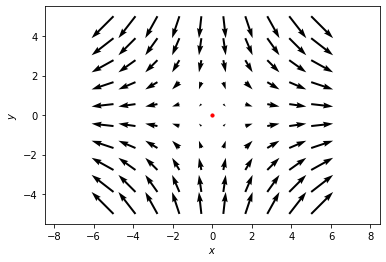

In [6]:
# Plotting grid
x, y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

# The velocity field 
u = 2*x
v = -2*y

# add in the stagnation point
plt.scatter([0],[0], c="r", marker="o", s= 10)

plt.quiver(x,y,u,v)
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

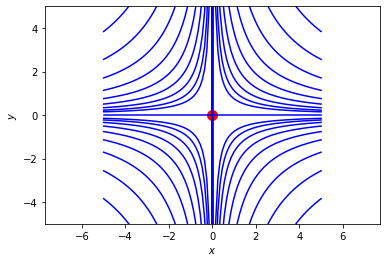

In [7]:
# The stream function is s = y. The level curves of the stream function is s = 2xy = const.
x = np.linspace(-5, 5, 100)

for i in range(10):
    if i != 0: 
        pos = np.where(np.abs(x) <= 0.00001)[0]
        x[pos] = np.nan
        y = 1.5**i/2/x
        ny = -y       
        plt.plot(x, 1.5**i/2/x, c="b")
        plt.plot(x, -1.5**i/2/x, c="b")

# add in the line for y = 0 
plt.plot( [-5, 5] , [0,0], c="b")

# add in the stagnation point
plt.scatter([0],[0], c="r", marker="o", s= 100)

plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([-5, 5])
plt.ylim([-5, 5]) 
plt.show()

#### Superposition of flow $P =  z + Qlog(z)/(2 \pi)$
Notice that this is the superposition of a uniform flow to the right $z$ and a source at the origin $log(z)$. 

The potential function is $ p = 1 + \frac{Qx}{2\pi(x^2 + y^2)} $ <br>
The stream function is $s  = 1 + \frac{-Qy}{2\pi(x^2 + y^2)}$  <br>

Find $P'= 1 + \frac{Q}{2\pi z}$. Observe that near the origin $1/z$ is the dominant term so the potential looks like that of a point source. At large $Z$ , $1 \gg 1/z$ is the dominant term and so the potential looks like that of a uniform flow. 

Setting $P' = 0$, we find a stagation point $-Q/(2\pi)$. 

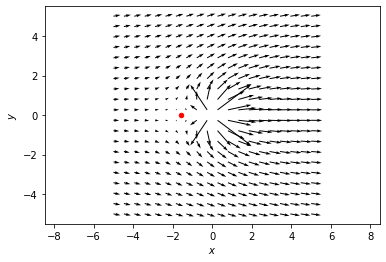

In [8]:
# Plotting grid
x, y = np.meshgrid(np.linspace(-5,5,20),np.linspace(-5,5,20))

# the source strength
Q = 10

# The velocity field 
u = 1 + Q*x/(2*np.pi*(x**2 + y**2))
v = Q*y/(2*np.pi*(x**2 + y**2))

# add in the stagnation point
plt.scatter([-Q/2.0/np.pi],[0], c="r", marker="o", s= 20)

plt.quiver(x,y,u,v)
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

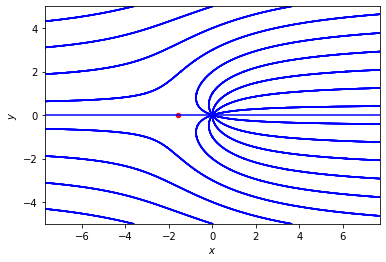

In [9]:
# The stream function is s = y. The level curves of the stream function is s = y + Q*theta/(2*pi) = const.
y = np.linspace(-5, 5, 1000000)

def find_min_dif(A,v): 
    # find the two indices of the array element that gives the minium difference to. 
    # print(v, A)
    mi = 10000
    for i in range(A.shape[0]-1):
        if abs(A[i] - v) < mi: 
            mi = abs(A[i] - v)
        
    if (A[mi] - v)*(A[mi+1] - v) < 0:
        return [mi, mi+1]   
    else:
        return [mi-1, mi]

        
for i in range(30):
    # remove points of discountinuity, i.e. points that give tan arg close to pi/2
    x = -y* np.tan(2*np.pi*(i-y)/Q)
    z = 2*np.pi*(i-y)/Q
    s = np.full(1000000, np.pi/2)
    pos = np.where(np.abs(np.mod(z,s)) <= 0.00001)[0]
    x[pos] = np.nan
    y[pos] = np.nan
    plt.plot(x, y, c="b")
            
# add in the stagnation point
plt.scatter([-Q/2.0/np.pi],[0], c="r", marker="o", s= 20)

# add in the  y = 0 line 
plt.plot([-10,10], [0,0], c="b")

plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([-5, 5])
plt.ylim([-5, 5]) 
plt.show()


### Conformal Mapping from xy-plane to Reimann Sphere
Now we can do a conformal mapping onto the Riemann Sphere with the setup of the sphere of radius $R$ and center at $(0,0,R)$. We then find the intersection of this sphere with line from the north pole of the sphere $(0,0,2R)$ to any point $(a,b)$ on the xy-plane. This gives the system of equations to solve for the transrformed coordinate $(x,y,z)$ given $(a,b)$:

$x^2 + y^2 + (z-R)^2 = R^2$ <br>
$ x/a =  y/b = z/-2R$ <br>

The solution is:

$d = a^2 + b^2 + 4R^2$ <br>
$z = 8R^3 / d $<br>
$x = 4aR^2/ d $<br>
$y = 4bR^2/ d $<br>

The strategy is to choose small $R$ such that the finte plane looks large and that its the boundary seems at infinity to the sphere. 

##### The  level curve of linear flow on the Reimann Sphere

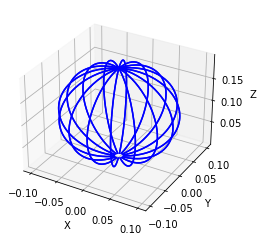

In [10]:
# 3D plotting setup 
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

R = .1
r = np.linspace(-5,5,1000)

for i in range(16):   
    # the linear potential 
    t = np.pi*2*i/16 # theta
    x = r*np.cos(t)
    y = r*np.sin(t)
    
    # transform to the Reimann sphere
    base = (x**2+y**2+4*R**2)
    z1 = 8*R**3/base
    x1 = 4*x*R**2/base
    y1 = 4*y*R**2/base
    ax.plot3D(x1, y1, z1, c = "blue")
    
plt.show()

##### The level curve of the uniform flow on the Reimann Sphere

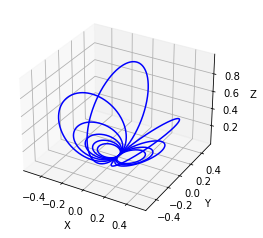

In [11]:
# 3D plotting setup 
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

R = .5
# The stream function is s = y. The level curves of the stream function is s = y = const.  
x = np.linspace(-100, 100, 20000)

# Sample 10 level curves 
for i in range(10):
    y = np.full(20000,-5+i)
    
    # transform onto the Reimana Sphere 
    base = x**2 + y**2 + 4*R**2 
    z1 = 8*R**3/base
    x1 = 4*x*R**2/base
    y1 = 4*y*R**2/base
    
    # plot 
    ax.plot3D(y1, x1, z1, c = "b")
    
plt.show()


##### The level curve of the superposed flow on the Reimann Sphere

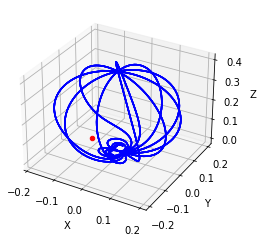

In [12]:
# 3D plotting setup 
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

R = .2

# The stream function is s = y. The level curves of the stream function is s = y + Q*theta/(2*pi) = const.
y = np.linspace(-5, 5, 10000)


def find_min_dif(A,v): 
    # find the two indices of the array element that gives the minium difference to. 
    # this function is used to remove discontinuitiy and plot funcions smoothly
    mi = 100
    for i in range(A.shape[0]-1):
        if abs(A[i] - v) < mi: 
            mi = abs(A[i] - v)
        
    if (A[mi] - v)*(A[mi+1] - v) < 0:
        return [mi, mi+1]   
    else:
        return [mi-1, mi]    

for i in range(30):
    # orginial superposed flow in 2D 
    x = -y* np.tan(2*np.pi*(i-y)/Q)
    z = 2*np.pi*(i-y)/Q
    s = np.full(10000, np.pi/2)
    
    # remove points of discountinuity, i.e. points that give tan arg close to pi/2
    pos = np.where(np.abs(np.mod(z,s)) <= 0.00001)[0]
    x[pos] = np.nan
    y[pos] = np.nan
    
    # transform onto the Reimana Sphere 
    base = x**2 + y**2 + 4*R**2 
    z1 = 8*R**3/base
    x1 = 4*x*R**2/base
    y1 = 4*y*R**2/base
    
    # plot 
    ax.plot3D(x1, y1, z1, c = "b")
    
# add in the stagnation point

x = -Q/2.0/np.pi
y = 0
base = x**2 + y**2 + 4*R**2 
z1 = 8*R**3/base
x1 = 4*x*R**2/base
y1 = 4*y*R**2/base

ax.scatter([x1],[y1], [z1], c="r", marker="o")


plt.show()

#### Take away 
- Complex function model flow well and provides easy analytic solution of potential and stream functions. 
- However, since the real and complex part of the complex potential are each vector field, its easier to visualize them individually. 
- Do special case handling to remove singularity of functions and add lines for special solutions that cannot be represented in functional forms. 
- Conformal mapping allows on to map flow from on shape/config/environment to the other while maintaining there flow properties. 


#### Further Directions
- 3D field diagrams with arrows 
- Systemize transformation from 2D to Reimann sphere and resolve interpolation issues